# 🚀 Polynomial Regression: Mastering Non-Linear Relationships

## 🎯 What You'll Learn in This Comprehensive Tutorial

Welcome to the exciting world of **Polynomial Regression**! 🌟 While linear regression draws straight lines through data, polynomial regression can capture **curves and complex patterns** that exist in real-world data.

### 🤔 **What is Polynomial Regression?**
Imagine you're trying to predict salaries based on job positions, but the relationship isn't a straight line - it curves upward as positions get more senior. **Polynomial regression** is like having a flexible ruler that can bend to follow the natural curves in your data!

**Simple Example:**
- **Linear**: Salary = a × Position + b (straight line)
- **Polynomial**: Salary = a × Position² + b × Position + c (curved line)

### 🏢 **Real-World Business Scenario**
You're an **HR Analytics Consultant** helping a company understand how salaries relate to position levels. The company suspects that salary growth isn't linear - it might accelerate for senior positions. Your job is to:
- 📊 **Compare linear vs polynomial models**
- 💰 **Predict salaries for new positions**  
- 📈 **Understand the true salary progression pattern**
- 🎯 **Make data-driven compensation recommendations**

### 🎓 **Learning Objectives**
By the end of this tutorial, you'll be able to:
1. ✅ **Understand when to use polynomial regression** vs linear regression
2. ✅ **Implement and compare both models** side-by-side
3. ✅ **Choose the optimal polynomial degree** for your data
4. ✅ **Interpret curved relationships** in business terms
5. ✅ **Make accurate predictions** for non-linear patterns
6. ✅ **Visualize and communicate results** effectively

### 🔄 **Our Complete Workflow**
1. **📚 Import Libraries & Dataset** - Set up our analysis environment
2. **🔍 Exploratory Data Analysis** - Understand the position-salary relationship
3. **📊 Mathematical Foundation** - Learn the theory behind polynomial regression
4. **🤖 Model Training** - Build both linear and polynomial models
5. **📈 Visualization & Comparison** - See the difference visually
6. **🎯 Predictions & Insights** - Apply models to real scenarios
7. **💡 Business Recommendations** - Translate results into action

### 🌟 **Why This Matters for Your Career**
Polynomial regression is everywhere in business:
- **Marketing**: Customer acquisition costs curve up with scale
- **Manufacturing**: Production costs have non-linear economies of scale  
- **Finance**: Risk-return relationships are often curved
- **Healthcare**: Dose-response relationships in medical treatments
- **Technology**: Performance vs resource allocation curves

---

**Ready to master the art of capturing curves in data? Let's dive in! 🏊‍♂️**

## 📚 Step 1: Import Essential Libraries

**What we're doing:** Setting up our data science toolkit with the essential libraries for polynomial regression analysis.

**🛠️ Our Toolkit:**
- **pandas** 🐼: Data manipulation and analysis (reading CSV, data exploration)
- **numpy** 🔢: Numerical computations and array operations  
- **matplotlib** 📊: Creating beautiful visualizations to compare models
- **scikit-learn** 🤖: Machine learning algorithms (coming up next!)

**💡 Think of it like this:** Before a chef starts cooking, they gather all their tools - knives, pans, ingredients. We're doing the same for our data science recipe!

In [ ]:
# 📚 Essential Libraries for Polynomial Regression Analysis
import pandas as pd          # 🐼 Data manipulation and analysis
import numpy as np           # 🔢 Numerical computations and arrays  
import matplotlib.pyplot as plt  # 📊 Data visualization

# Set up plotting style for better visualizations
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)  # Standard figure size
plt.rcParams['font.size'] = 12             # Readable font size

print("✅ All libraries imported successfully!")
print("🎯 Ready to explore polynomial regression!")

# Display versions for reproducibility
print(f"\n📦 Library Versions:")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"matplotlib: {plt.matplotlib.__version__}")

## 📊 Step 2: Import and Explore Our Dataset

**🏢 Business Context:** We're analyzing the **Position_Salaries.csv** dataset, which contains information about different job positions and their corresponding salary levels in a company.

**🎯 Our Mission:** Understand the relationship between position level and salary to:
- 💰 Predict salaries for new positions
- 📈 Understand salary progression patterns
- 🤔 Determine if the relationship is linear or curved
- 💼 Make data-driven compensation decisions

**📋 What to Expect in Our Dataset:**
- **Position**: Job titles (Business Analyst, Junior Consultant, etc.)
- **Level**: Numerical position level (1-10 scale)
- **Salary**: Annual compensation for each position

**🔍 Key Questions We'll Answer:**
1. Is salary progression linear or does it accelerate at higher levels?
2. How much should we pay a Level 6.5 position?
3. Which model (linear vs polynomial) better captures the pattern?

In [ ]:
# 📊 Load and Prepare Our Position-Salary Dataset
Dataset = pd.read_csv('../Dataset/Position_Salaries.csv')

# 🎯 Feature Engineering: Separate features and target
# X (Features): Position Level - what we use to predict
# y (Target): Salary - what we want to predict
X = Dataset.iloc[:, 1:-1].values  # Position Level (middle column)
y = Dataset.iloc[:, -1].values    # Salary (last column)

print("🎉 Dataset loaded successfully!")
print(f"📈 Dataset shape: {Dataset.shape} (rows, columns)")
print(f"🎯 Features (X) shape: {X.shape}")  
print(f"💰 Target (y) shape: {y.shape}")

# Quick data type check
print(f"\n📋 Dataset Info:")
print(f"Feature type: {type(X[0][0])}")
print(f"Target type: {type(y[0])}")

In [ ]:
# 🔍 Let's Explore Our Complete Dataset
print("🏢 Complete Position-Salary Dataset:")
print("=" * 50)
print(Dataset)

print(f"\n💡 Dataset Insights:")
print(f"• Total positions analyzed: {len(Dataset)}")
print(f"• Position levels range: {Dataset.iloc[:, 1].min()} to {Dataset.iloc[:, 1].max()}")
print(f"• Salary range: ${Dataset.iloc[:, -1].min():,} to ${Dataset.iloc[:, -1].max():,}")
print(f"• Average salary: ${Dataset.iloc[:, -1].mean():,.0f}")

# Quick pattern observation
salary_growth = Dataset.iloc[-1, -1] / Dataset.iloc[0, -1]
print(f"• Salary growth from lowest to highest position: {salary_growth:.1f}x")

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [ ]:
# 🎯 Our Features (X): Position Levels
print("🎯 Features (X) - Position Levels:")
print("=" * 40)
print("These are the numerical position levels we'll use to predict salaries:")
print(X.flatten())  # flatten() makes it easier to read

print(f"\n📊 Feature Analysis:")
print(f"• Minimum level: {X.min()}")
print(f"• Maximum level: {X.max()}")  
print(f"• Number of positions: {len(X)}")
print(f"• Data type: {X.dtype}")

print(f"\n💡 What this means:")
print(f"• Level 1 = Entry level position")
print(f"• Level 10 = Most senior position")
print(f"• We have data for every level from 1 to 10")

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10


In [ ]:
# 💰 Our Target (y): Salaries
print("💰 Target (y) - Annual Salaries:")
print("=" * 40)
print("These are the salaries we want to predict based on position level:")
for i, salary in enumerate(y):
    print(f"Level {i+1}: ${salary:,}")

print(f"\n📊 Salary Analysis:")
print(f"• Lowest salary: ${y.min():,}")
print(f"• Highest salary: ${y.max():,}")
print(f"• Average salary: ${y.mean():,.0f}")
print(f"• Median salary: ${np.median(y):,.0f}")
print(f"• Salary standard deviation: ${y.std():,.0f}")

# Calculate growth rates between levels
print(f"\n📈 Salary Growth Pattern:")
for i in range(1, len(y)):
    growth_rate = ((y[i] - y[i-1]) / y[i-1]) * 100
    print(f"Level {i} to {i+1}: +{growth_rate:.1f}% (${y[i] - y[i-1]:,} increase)")

print(f"\n🤔 Initial Observation:")
print("Notice how salary growth accelerates at higher levels!")
print("This suggests a NON-LINEAR relationship - perfect for polynomial regression!")

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


## 🔍 Step 3: Data Quality Check - Missing Values

**🎯 Why This Matters:** Before building any model, we must ensure our data is clean and complete. Missing values can:
- 🚫 **Break our model training**
- 📉 **Lead to biased predictions**  
- 🤔 **Hide important patterns**

**🔍 What We're Checking:**
- Are there any missing salary values?
- Are there any missing position levels?
- Is our dataset complete for analysis?

**💡 Good News:** Small datasets like ours (10 positions) are usually complete, but it's always good practice to verify!

In [ ]:
# 🔍 Comprehensive Data Quality Check
print("🔍 Data Quality Assessment:")
print("=" * 50)

# Check for missing values
missing_values = Dataset.isnull().sum()
print("Missing values per column:")
for column, missing_count in missing_values.items():
    status = "✅ Complete" if missing_count == 0 else f"❌ {missing_count} missing"
    print(f"• {column}: {status}")

# Overall data completeness
total_cells = Dataset.shape[0] * Dataset.shape[1]
missing_cells = Dataset.isnull().sum().sum()
completeness = ((total_cells - missing_cells) / total_cells) * 100

print(f"\n📊 Overall Data Quality:")
print(f"• Total data points: {total_cells}")
print(f"• Missing data points: {missing_cells}")
print(f"• Data completeness: {completeness:.1f}%")

if missing_cells == 0:
    print(f"\n🎉 Excellent! Our dataset is 100% complete!")
    print(f"• No missing salaries to predict")
    print(f"• No missing position levels")
    print(f"• Ready to proceed with model training!")
else:
    print(f"\n⚠️ Action needed: Handle {missing_cells} missing values before modeling")

# Additional data validation
print(f"\n🔍 Data Validation Checks:")
print(f"• All position levels are positive: {all(X.flatten() > 0)}")
print(f"• All salaries are positive: {all(y > 0)}")
print(f"• Position levels are sequential: {list(X.flatten()) == list(range(1, 11))}")

Dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

## 📊 Step 3.5: Exploratory Data Analysis (EDA) - Visual Insights

**🎯 The Big Question:** Is the relationship between position level and salary **linear** (straight line) or **non-linear** (curved)?

**📈 What We'll Discover:**
- The overall pattern in our position-salary data
- Whether salary growth is consistent or accelerating
- Initial hints about which model might work better

**💡 Why This Matters:** Understanding the data pattern helps us choose the right algorithm and interpret our results correctly!

In [ ]:
# 📊 Initial Data Visualization: Understanding the Pattern
plt.figure(figsize=(12, 8))

# Create the scatter plot
plt.scatter(X, y, color='red', s=100, alpha=0.7, edgecolors='darkred', linewidth=2)

# Enhance the plot
plt.title('🏢 Position Level vs Salary: What Pattern Do You See?', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Position Level', fontsize=14, fontweight='bold')
plt.ylabel('Annual Salary ($)', fontsize=14, fontweight='bold')

# Format y-axis to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Add annotations for key observations
plt.annotate('Entry Level\n$45K', xy=(1, 45000), xytext=(1.5, 60000),
            arrowprops=dict(arrowstyle='->', color='blue', lw=2),
            fontsize=10, color='blue', fontweight='bold')

plt.annotate('Senior Level\n$1M+', xy=(10, 1000000), xytext=(8.5, 1200000),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=10, color='green', fontweight='bold')

plt.tight_layout()
plt.show()

# Analyze the growth pattern
print("🔍 Pattern Analysis:")
print("=" * 50)

# Calculate growth rates between consecutive levels
growth_rates = []
for i in range(1, len(y)):
    growth_rate = ((y[i] - y[i-1]) / y[i-1]) * 100
    growth_rates.append(growth_rate)
    
print(f"Average growth rate: {np.mean(growth_rates):.1f}%")
print(f"Growth rate range: {np.min(growth_rates):.1f}% to {np.max(growth_rates):.1f}%")

# Check if growth is accelerating
early_growth = np.mean(growth_rates[:3])  # First 3 transitions
late_growth = np.mean(growth_rates[-3:])  # Last 3 transitions

print(f"\n📈 Growth Pattern Analysis:")
print(f"• Early levels (1-4) average growth: {early_growth:.1f}%")
print(f"• Later levels (7-10) average growth: {late_growth:.1f}%")

if late_growth > early_growth * 1.5:
    print(f"🎯 INSIGHT: Growth ACCELERATES at higher levels!")
    print(f"   This suggests a NON-LINEAR (polynomial) relationship!")
else:
    print(f"🎯 INSIGHT: Growth appears relatively consistent.")
    print(f"   This might suggest a LINEAR relationship.")

## 🔢 Step 4: Mathematical Foundation - Understanding Polynomial Regression

**🎓 The Mathematics Made Simple:**

**Linear Regression (What we know):**
```
Salary = a × Level + b
```
- **Result**: A straight line
- **Limitation**: Can't capture curves in data

**Polynomial Regression (Our new tool):**
```
Salary = a × Level² + b × Level + c    (Degree 2)
Salary = a × Level³ + b × Level² + c × Level + d    (Degree 3)
```
- **Result**: Curved lines that can fit complex patterns
- **Power**: Can capture non-linear relationships!

**🎯 Key Concepts:**

**1. Polynomial Degree:**
- **Degree 1**: Linear (straight line) - y = ax + b
- **Degree 2**: Quadratic (U-shaped curve) - y = ax² + bx + c  
- **Degree 3**: Cubic (S-shaped curve) - y = ax³ + bx² + cx + d
- **Higher degrees**: More complex curves

**2. Feature Transformation:**
Instead of just [Level], we create: [Level, Level², Level³, ...]
- Original: [1, 2, 3, 4, 5]
- Degree 2: [1, 1, 2, 4, 3, 9, 4, 16, 5, 25]
- This gives linear regression more "features" to work with!

**3. The Trade-off:**
- ⬆️ **Higher degree**: Better fit to training data
- ⚠️ **Too high**: Overfitting (poor predictions on new data)
- 🎯 **Sweet spot**: Usually degree 2-4 for most business problems

**💡 Real-World Analogy:**
Think of polynomial regression like a flexible rope:
- **Linear**: Stiff rope (only straight lines)
- **Polynomial**: Flexible rope that can bend to follow the data's natural curves
- **Too flexible**: Rope follows every tiny wiggle (overfitting)

**🤔 Why This Works for Salaries:**
- Entry-level positions: Modest, consistent growth
- Mid-level positions: Steady increases  
- Senior positions: Rapid acceleration due to scarcity and responsibility

**This creates a CURVED pattern - perfect for polynomial regression!**

In [ ]:
# 🔢 Demonstrating Polynomial Feature Transformation
print("🔢 Understanding Polynomial Feature Transformation:")
print("=" * 60)

# Show original features
print("📊 Original Position Levels:")
print(f"X_original = {X.flatten()}")

# Import polynomial features for demonstration
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features of different degrees
degrees = [1, 2, 3, 4]
for degree in degrees:
    poly_transformer = PolynomialFeatures(degree=degree, include_bias=False)
    X_transformed = poly_transformer.fit_transform(X)
    
    print(f"\n🎯 Degree {degree} Transformation:")
    print(f"Feature names: {poly_transformer.get_feature_names_out(['Level'])}")
    print(f"Shape: {X_transformed.shape}")
    print(f"First few rows:")
    for i in range(min(3, len(X_transformed))):
        print(f"  Level {i+1}: {X_transformed[i]}")

print(f"\n💡 Key Insights:")
print(f"• Degree 1: Just the original level (linear regression)")
print(f"• Degree 2: Adds Level² (can capture U-shaped curves)")  
print(f"• Degree 3: Adds Level³ (can capture S-shaped curves)")
print(f"• Degree 4: Adds Level⁴ (even more flexibility)")

print(f"\n🎯 For Our Business Problem:")
print(f"We'll test degree 4 to see if salary growth has complex patterns!")
print(f"The algorithm will automatically find the best coefficients.")

## 🎯 Step 5: Training Set Strategy - Why We're Using All Data

**🤔 A Special Case: Small Dataset Considerations**

**Traditional Approach:** Split data into training (80%) and testing (20%)
- **Training set**: Learn patterns
- **Test set**: Evaluate performance on unseen data

**Our Situation:** Only 10 data points for salary levels 1-10
- **Challenge**: If we split, we'd have gaps (e.g., missing levels 3, 7, 9)
- **Problem**: Can't properly train or evaluate with missing levels
- **Solution**: Use all data for training, then test on interpolation

**📊 Our Strategy:**
1. **Train both models** on all 10 data points
2. **Compare model fits** visually and mathematically  
3. **Test prediction accuracy** on intermediate values (e.g., level 6.5)
4. **Evaluate business applicability** of both approaches

**💡 Why This Makes Sense:**
- **Complete coverage**: No missing position levels
- **Real-world scenario**: HR needs to predict salaries for ALL levels
- **Model comparison**: Focus on which captures the pattern better
- **Practical application**: Level 6.5 represents mid-senior positions

**🎯 Success Metrics:**
- **Visual fit**: How well does the line follow the data?
- **Prediction accuracy**: Reasonable salary for level 6.5?
- **Business intuition**: Does the model make logical sense?

In [ ]:
# 🎯 Data Preparation: Using Complete Dataset for Training
print("🎯 Training Strategy for Small Dataset:")
print("=" * 50)

print(f"📊 Our Dataset Characteristics:")
print(f"• Total data points: {len(X)}")
print(f"• Position levels: {X.flatten()}")
print(f"• Complete range: Level {X.min()} to Level {X.max()}")

print(f"\n🤔 Why We're Using All Data:")
print(f"• With only 10 points, splitting would create gaps")
print(f"• HR needs predictions for ALL position levels")
print(f"• Focus is on model comparison, not traditional train/test split")

print(f"\n🎯 Our Training Approach:")
print(f"✅ Train Linear Regression on all 10 points")
print(f"✅ Train Polynomial Regression on all 10 points")  
print(f"✅ Compare model fits visually")
print(f"✅ Test prediction on intermediate value (Level 6.5)")

print(f"\n💡 In Larger Datasets:")
print(f"• We would use train_test_split()")
print(f"• Typical split: 80% training, 20% testing")
print(f"• This ensures model generalizes to unseen data")

print(f"\n🚀 Ready to train both models and compare results!")

# Prepare our features and target for both models
X_train = X  # Using all data
y_train = y  # Using all data

print(f"\n📋 Training Data Summary:")
print(f"• Features shape: {X_train.shape}")
print(f"• Target shape: {y_train.shape}")
print(f"• Ready for model training! 🚀")

## 🤖 Step 6a: Training Linear Regression Model (The Baseline)

**🎯 What We're Doing:** Building a traditional linear regression model that draws a straight line through our data.

**📐 Mathematical Foundation:**
```
Salary = a × Level + b
```

**🏢 Business Interpretation:**
- **'a' (slope)**: How much salary increases per position level
- **'b' (intercept)**: Base salary (theoretical Level 0 salary)

**🎯 Why Start with Linear?**
1. **Baseline model**: Simple and interpretable
2. **Comparison point**: See how much polynomial improves
3. **Business clarity**: Easy to explain to stakeholders
4. **Benchmark**: Standard approach for salary analysis

**💡 What to Expect:**
- Linear model will try to fit a straight line
- May miss the curve in higher-level salaries
- Good for understanding general trend
- Limited accuracy for non-linear patterns

**🔍 Key Questions We'll Answer:**
- How well does a straight line fit our salary data?
- What's the average salary increase per level?
- Where does linear regression struggle?

In [ ]:
# 🤖 Training Linear Regression Model (Baseline)
from sklearn.linear_model import LinearRegression

print("🤖 Training Linear Regression Model:")
print("=" * 50)

# Create and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Extract model parameters
slope = lin_reg.coef_[0]
intercept = lin_reg.intercept_

print("✅ Linear Regression Model Trained Successfully!")
print(f"\n📊 Model Parameters:")
print(f"• Slope (coefficient): ${slope:,.0f} per level")
print(f"• Intercept: ${intercept:,.0f}")

print(f"\n💼 Business Interpretation:")
print(f"• Each position level increases salary by ${slope:,.0f}")
print(f"• Theoretical 'Level 0' salary: ${intercept:,.0f}")

# Model equation
print(f"\n📐 Our Linear Model Equation:")
print(f"Salary = {slope:,.0f} × Level + {intercept:,.0f}")

# Calculate R² score (how well the model fits)
from sklearn.metrics import r2_score
linear_r2 = r2_score(y_train, lin_reg.predict(X_train))
print(f"\n📈 Model Performance:")
print(f"• R² Score: {linear_r2:.3f}")
print(f"• Interpretation: Linear model explains {linear_r2*100:.1f}% of salary variation")

if linear_r2 > 0.8:
    print(f"• Assessment: Good fit for a linear model! ✅")
elif linear_r2 > 0.6:
    print(f"• Assessment: Moderate fit - room for improvement 📈")
else:
    print(f"• Assessment: Poor fit - non-linear model likely needed ⚠️")

# Show predictions for all levels
print(f"\n🎯 Linear Model Predictions:")
predictions = lin_reg.predict(X_train)
for i, (actual, predicted) in enumerate(zip(y_train, predictions)):
    error = abs(actual - predicted)
    print(f"Level {i+1}: Actual ${actual:,} | Predicted ${predicted:,.0f} | Error ${error:,.0f}")

print(f"\n💡 Key Observation:")
print(f"Notice where the linear model struggles most - this will guide our polynomial model!")

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 🚀 Step 6b: Training Polynomial Regression Model (The Flexible Approach)

**🎯 What We're Doing:** Building a polynomial regression model that can capture curved patterns in our salary data.

**🔢 Mathematical Foundation:**
```
Salary = a × Level⁴ + b × Level³ + c × Level² + d × Level + e
```

**🎨 The Two-Step Process:**
1. **Feature Transformation**: Convert [Level] → [Level, Level², Level³, Level⁴]
2. **Linear Regression**: Apply linear regression to these polynomial features

**🧠 Why This Works:**
- We're still using LinearRegression() under the hood!
- But we're giving it more "features" to work with
- The model can now fit curves instead of just straight lines

**💡 Degree 4 Choice:**
- **Degree 1**: Straight line (same as linear regression)
- **Degree 2**: Can capture U-shaped curves  
- **Degree 3**: Can capture S-shaped curves
- **Degree 4**: Even more flexibility for complex patterns

**🎯 What to Expect:**
- Better fit to the curved salary progression
- Higher R² score than linear regression
- More accurate predictions, especially for senior levels
- Model that captures the acceleration in salary growth

**🔍 Key Questions We'll Answer:**
- How much better does polynomial fit our data?
- Can it capture the salary acceleration at senior levels?
- What does the curved relationship tell us about compensation?

In [ ]:
# 🚀 Training Polynomial Regression Model (Degree 4)
from sklearn.preprocessing import PolynomialFeatures

print("🚀 Training Polynomial Regression Model:")
print("=" * 50)

# Step 1: Create polynomial features (degree 4)
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)

print(f"📊 Feature Transformation:")
print(f"• Original features: {X_train.shape} (just Level)")
print(f"• Polynomial features: {X_poly.shape} (Level, Level², Level³, Level⁴, + intercept)")
print(f"• Feature names: {poly_reg.get_feature_names_out(['Level'])}")

# Step 2: Train linear regression on polynomial features
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

print(f"\n✅ Polynomial Regression Model Trained Successfully!")

# Extract coefficients
coefficients = lin_reg_2.coef_
intercept_poly = lin_reg_2.intercept_

print(f"\n📊 Model Coefficients:")
feature_names = poly_reg.get_feature_names_out(['Level'])
for i, (name, coef) in enumerate(zip(feature_names, coefficients)):
    if abs(coef) > 1:
        print(f"• {name}: {coef:,.2f}")
    else:
        print(f"• {name}: {coef:.6f}")

print(f"• Intercept: ${intercept_poly:,.0f}")

# Calculate R² score for polynomial model
poly_predictions = lin_reg_2.predict(X_poly)
poly_r2 = r2_score(y_train, poly_predictions)

print(f"\n📈 Model Performance Comparison:")
print(f"• Linear R² Score: {linear_r2:.3f} ({linear_r2*100:.1f}% explained variance)")
print(f"• Polynomial R² Score: {poly_r2:.3f} ({poly_r2*100:.1f}% explained variance)")
print(f"• Improvement: +{(poly_r2-linear_r2)*100:.1f} percentage points")

if poly_r2 > linear_r2 + 0.05:
    print(f"• Assessment: Significant improvement with polynomial! 🚀")
elif poly_r2 > linear_r2:
    print(f"• Assessment: Moderate improvement 📈")
else:
    print(f"• Assessment: Minimal improvement - linear might be sufficient ⚠️")

# Show polynomial predictions
print(f"\n🎯 Polynomial Model Predictions:")
for i, (actual, predicted) in enumerate(zip(y_train, poly_predictions)):
    error = abs(actual - predicted)
    improvement = abs(actual - lin_reg.predict(X_train)[i]) - error
    print(f"Level {i+1}: Actual ${actual:,} | Predicted ${predicted:,.0f} | Error ${error:,.0f} | Improvement ${improvement:,.0f}")

print(f"\n💡 Key Insight:")
print(f"The polynomial model should fit the curved salary progression much better!")
print(f"Next: Let's visualize both models to see the difference! 📊")

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 📊 Step 7a: Visualizing Linear Regression Results

**🎯 What We're Seeing:** Our linear regression model attempts to draw the "best fit" straight line through all salary data points.

**📈 What to Look For:**
- **Red dots**: Actual salary data points
- **Blue line**: Linear regression predictions (straight line)
- **Gaps**: Where the straight line misses the actual data
- **Pattern**: Does the line capture the overall trend?

**💡 Expected Observations:**
- **Good fit** for middle-level positions
- **Underestimation** for senior positions (curve goes up faster)
- **Possible overestimation** for entry-level positions
- **Limited flexibility** due to straight-line constraint

**🏢 Business Implications:**
- Linear model assumes **constant salary growth** per level
- Real world: Salary growth often **accelerates** at senior levels
- **Risk**: Under-budgeting for senior hires, over-budgeting for junior roles

**🔍 Critical Question:** Does this straight line adequately represent your company's salary structure?

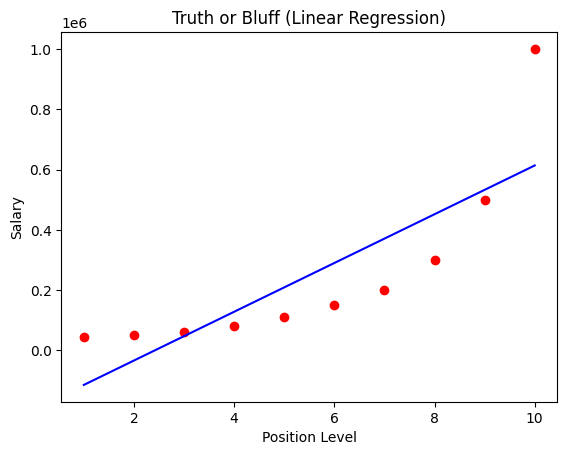

In [ ]:
# 📊 Visualizing Linear Regression Results
plt.figure(figsize=(12, 8))

# Plot actual data points
plt.scatter(X_train, y_train, color='red', s=120, alpha=0.8, 
           edgecolors='darkred', linewidth=2, label='Actual Salaries', zorder=5)

# Plot linear regression line
linear_predictions = lin_reg.predict(X_train)
plt.plot(X_train, linear_predictions, color='blue', linewidth=3, 
         label=f'Linear Regression (R² = {linear_r2:.3f})', alpha=0.8)

# Enhance the plot
plt.title('🏢 Linear Regression: Position Level vs Salary\n"Can a Straight Line Capture Salary Progression?"', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Position Level', fontsize=14, fontweight='bold')
plt.ylabel('Annual Salary ($)', fontsize=14, fontweight='bold')

# Format y-axis to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add grid and legend
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=12, loc='upper left')

# Add annotations for key insights
# Find the biggest errors
errors = [abs(actual - pred) for actual, pred in zip(y_train, linear_predictions)]
max_error_idx = errors.index(max(errors))
max_error_level = X_train[max_error_idx][0]
max_error_actual = y_train[max_error_idx]
max_error_pred = linear_predictions[max_error_idx]

plt.annotate(f'Biggest Error\nActual: ${max_error_actual:,.0f}\nPredicted: ${max_error_pred:,.0f}\nError: ${max(errors):,.0f}', 
            xy=(max_error_level, max_error_actual), 
            xytext=(max_error_level-1.5, max_error_actual+200000),
            arrowprops=dict(arrowstyle='->', color='orange', lw=2),
            fontsize=10, color='orange', fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Detailed analysis
print("🔍 Linear Regression Analysis:")
print("=" * 50)

print(f"\n📊 Model Performance:")
print(f"• R² Score: {linear_r2:.3f} (explains {linear_r2*100:.1f}% of variance)")
print(f"• Average prediction error: ${np.mean(errors):,.0f}")
print(f"• Maximum prediction error: ${max(errors):,.0f} (Level {max_error_level})")

print(f"\n🎯 Where Linear Regression Struggles:")
sorted_errors = sorted(enumerate(errors), key=lambda x: x[1], reverse=True)
for i, (idx, error) in enumerate(sorted_errors[:3]):
    level = X_train[idx][0]
    actual = y_train[idx]
    predicted = linear_predictions[idx]
    print(f"{i+1}. Level {level}: ${error:,.0f} error (Actual: ${actual:,}, Predicted: ${predicted:,.0f})")

print(f"\n💡 Key Observations:")
print(f"• Linear model works reasonably well for mid-levels")
print(f"• Significant errors at extreme levels (very junior/senior)")
print(f"• Straight line can't capture salary acceleration at senior levels")
print(f"• This suggests a CURVED relationship - perfect for polynomial regression!")

print(f"\n🚀 Next: Let's see how polynomial regression handles these curves!")

## Visualising the Polynomial Regression results

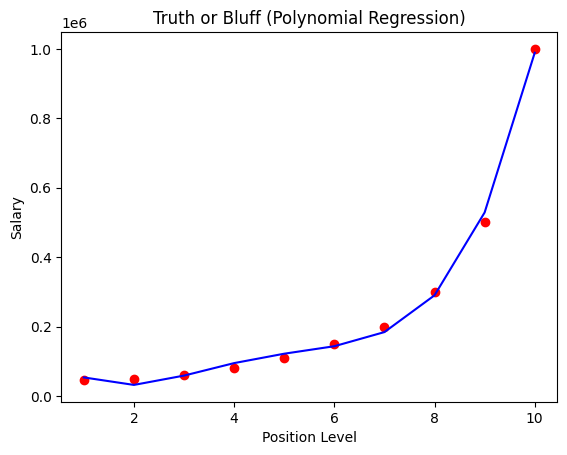

In [34]:
plt.scatter(x,y,color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

In [38]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

NameError: name 'X' is not defined

## Predicting a new result with Linear Regression

In [36]:
lin_reg.predict([[6.5]])

c:\Users\Morobang\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [37]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])